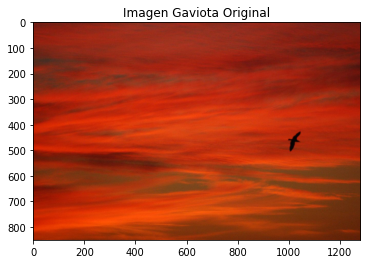

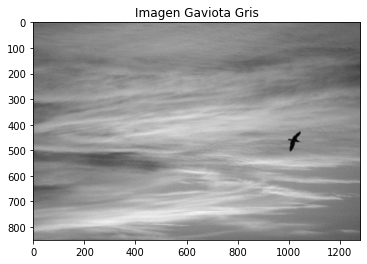

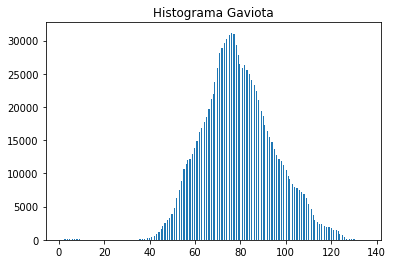

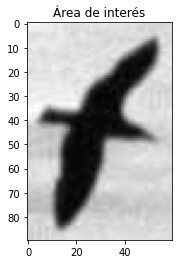

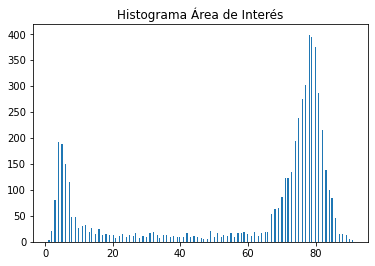

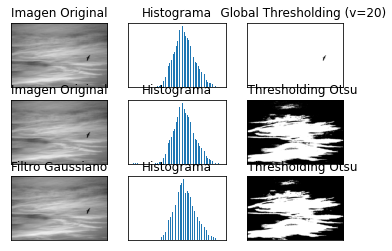

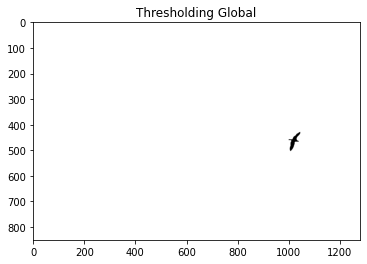

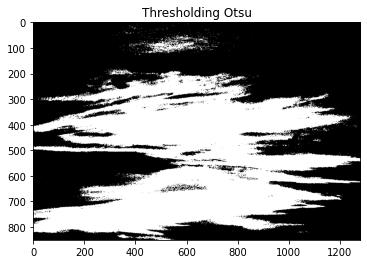

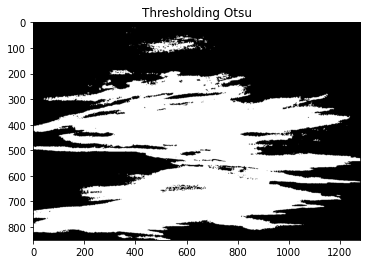

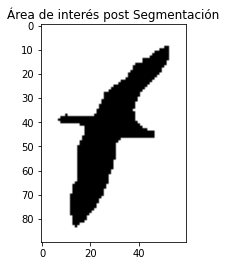

In [111]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.filters import threshold_otsu
from skimage import measure
img = cv2.imread('gaviota.jpg')
imgcol=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(imgcol)
plt.title('Imagen Gaviota Original')
plt.show()

img = cv2.imread('gaviota.jpg',0)
plt.imshow(img,cmap='gray')
plt.title('Imagen Gaviota Gris')
plt.show()


plt.hist(img.ravel(),256)
plt.title('Histograma Gaviota')
plt.show()

img.shape

roi=img[420:510,990:1050]
plt.imshow(roi,cmap='gray')
plt.title('Área de interés')
plt.show()

plt.hist(roi.ravel(),256)
plt.title('Histograma Área de Interés')
plt.show()


# global thresholding
ret1,th1 = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,20,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,20,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Plotear las imagenes y sus histogramas


images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Imagen Original','Histograma','    Global Thresholding (v=20)',
'Imagen Original','Histograma',"    Thresholding Otsu",
'Filtro Gaussiano','Histograma',"    Thresholding Otsu"]
miArray = np.arange(3)
for i in miArray:
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
  
plt.show()


plt.imshow(th1,cmap='gray')
plt.title('Thresholding Global')
plt.show()
plt.imshow(th2,cmap='gray')
plt.title('Thresholding Otsu')
plt.show()
plt.imshow(th3,cmap='gray')
plt.title('Thresholding Otsu')
plt.show()
roi2=th1[420:510,990:1050]
plt.imshow(roi2,cmap='gray')
plt.title('Área de interés post Segmentación')
plt.show()